# Perceptron

## Application: Handwritten Recognition using sklearn.datasets.load_digits

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Define function to train perceptron

In [24]:
def perceptron_train(X,Y,iterations=100,eta=.1):
    '''
    Perceptron works for a binary calssification only, so i.e. it will say if it is a specific number or not.
    It receives X (input values, 1797 rows by 64 cols, with values from 0 to 255 (pixe values)) and Y (output values, 
    1797 rows by 1 cols with values -0.5 if not the digit to recognize and 0.5 if the digit to recognize), uses by 
    default 100 iterations with a defalult learning rate of 0.1
    '''
    
    # X dim (1797,64) values from 0 to 255 (pixel values)
    # Y array of 1797 values -1 or 1 (digit to recognize?)
    # weights array of 64 
    
    # initialize vector of zeros with the same size as the iterations (iterations impact accuracy (acc)) in order
    # to graph at the end
    
    acc = sp.zeros(iterations)
    
    # initialize weight vector w/ random values from [-1,1] with same size as columns from X (64) and scaled by 1e-5
    # to avoid being more than 1 or less than -1
    
    weights = sp.random.randn(X.shape[1]) * 1e-5
    
    # Need to update weight if a misclassification, there is iter=100 possibilities to find a misclassification
    
    for it in sp.arange(iterations):
        
        # indexes of misclassified data
        
        wrong = (sp.sign(X @ weights) != Y).nonzero()[0]  
        
        # at least there is one misclassified data point
        
        if wrong.shape[0] > 0:
            
            # pick only one random misclassified data point
            
            rand_ex = sp.random.randint(0,wrong.shape[0])
            
            # update weight vector, how much distance by gradient scaled by factor eta/(1.+it) and in which direction
            # depending on X*Y
            
            weights += (eta/(1.+it))*X[wrong[rand_ex],:] * Y[wrong[rand_ex]] 
            
            # compute accuracy
            
            acc[it] = sp.double(sp.sum(sp.sign(X @ weights)==Y))/X.shape[0]
    
    # return weight vector (for recognizing the "digit_to_recognize" number) and accuracy
    
    return weights,acc

### Define function to test perceptron and graphing learning curve

In [39]:
import scipy as sp
from sklearn.datasets import load_digits

def test(digit_to_recognize=4):
    # load the digits dataset from sklearn repository
    n_example = 100
    X, Y = load_digits(n_class=10, return_X_y=True)
    plt.matshow(X[n_example,:].reshape(8,8));
    plt.xticks([]);plt.yticks([]);
    plt.title(Y[n_example])
    plt.savefig("usps_example.png")
    # transform the 10-class labels into binary form
    y = sp.sign((Y==digit_to_recognize)* 1.0 - .5)
    weights , acc = perceptron_train(X,y)
    plt.figure(figsize=[12,4])
    plt.plot(acc)
    plt.xlabel("Iterations");plt.ylabel("Accuracy");
    plt.savefig("learning_curve.png")
    return weights

array([ 1.79594407e-05, -1.50856949e-01,  4.64083693e-01, -2.76652738e-01,
       -1.27653527e-01,  5.38247607e-01,  5.07242889e-01,  6.66668912e-03,
        1.02228323e-05, -7.73958258e-01,  5.92448785e-01, -2.01610668e-01,
       -4.05581469e-01, -8.49005316e-01, -3.64915020e-01,  2.01028747e-03,
       -2.47089610e-03,  4.45591393e-01,  1.08369019e+00, -1.39321824e-01,
       -8.42721088e-01, -1.55424284e+00, -3.89407143e-01, -1.42920569e-02,
       -3.87284385e-03,  6.71379564e-01,  8.27901768e-01,  7.54190754e-01,
        6.64903373e-01, -1.22551517e+00, -3.13542326e-01, -1.97583593e-05,
        2.85855784e-06,  2.90300733e-01,  2.57266493e-01, -3.02196556e-01,
        3.14489067e-01, -1.15073169e-01, -5.10575007e-01,  9.28816277e-06,
        7.78694058e-06, -1.07277741e-01, -8.36762159e-01, -1.03894456e+00,
       -8.53614128e-01, -3.35617470e-02, -7.11060840e-01, -2.50005780e-02,
        7.37158409e-06,  9.81443536e-02,  3.70431137e-02, -7.14756915e-01,
       -1.11917012e-01,  

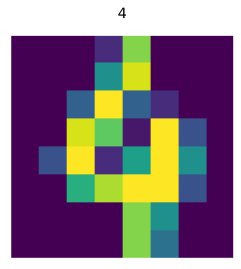

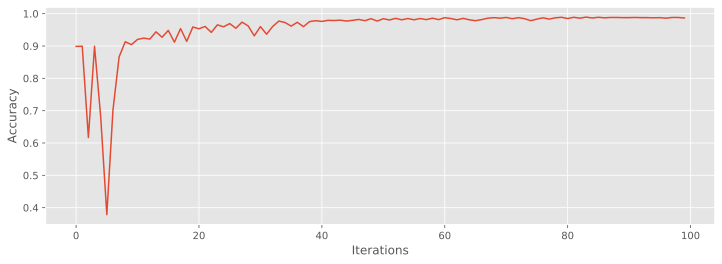

In [40]:
test(5)